# BASICS 01 - Load events with Tonic and make Time Surfaces

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import tonic
from hots.timesurface import timesurface
from hots.utils import get_loader, get_dataset_info
import matplotlib.pyplot as plt

number of samples in the trainset: 48
number of samples in the testset: 48
----------------------------------------
number of samples in each class for the trainset: [12. 12. 12. 12.]
number of samples in each class for the testset: [12. 12. 12. 12.]
----------------------------------------
Mean value for time: 17283.270833333332
Mean value for mean_isi: 6.934187320013135
Mean value for nb_events: 2991.0208333333335


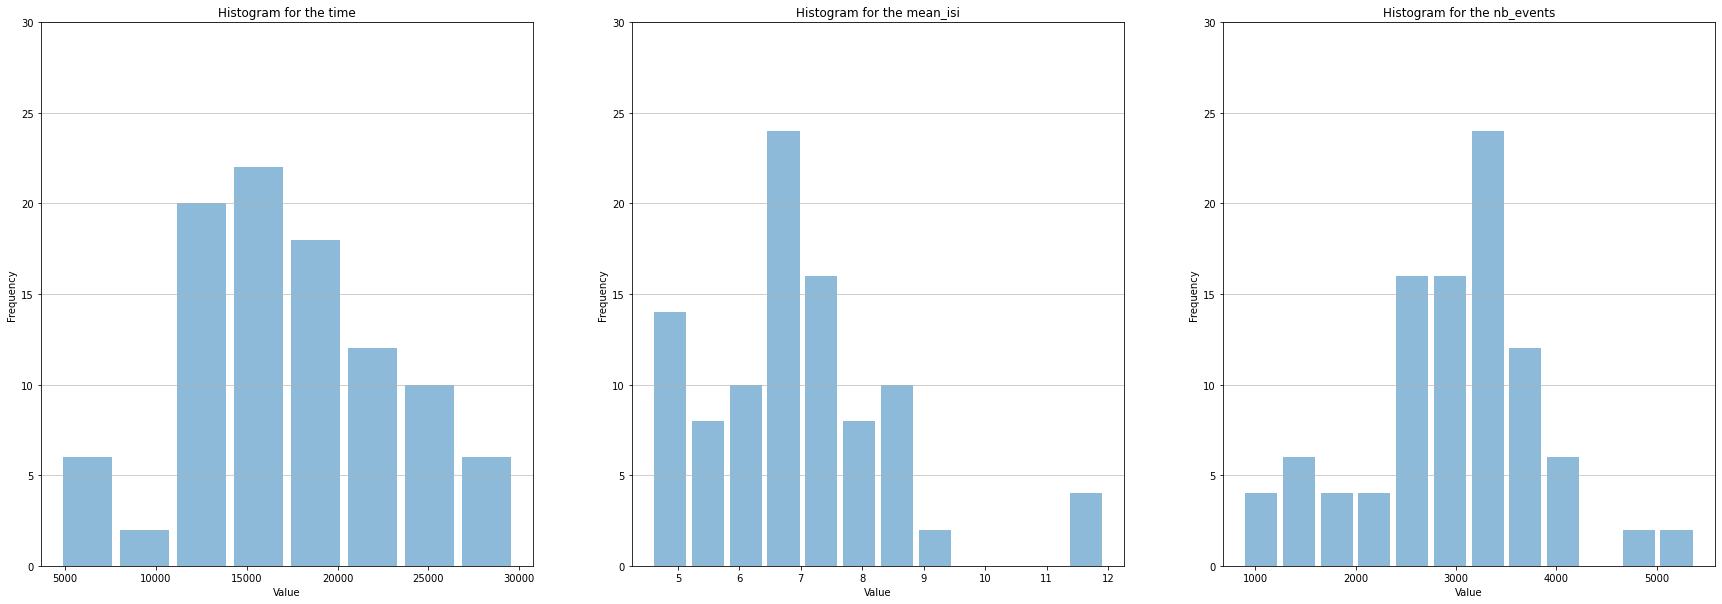

In [3]:
transform = tonic.transforms.NumpyAsType(int)
dataset = tonic.datasets.POKERDVS(save_to='../../Data/', train=True,transform=transform)
loader = get_loader(dataset)
get_dataset_info(dataset,dataset, properties = ['time', 'mean_isi', 'nb_events']);

In [4]:
events, target = next(iter(loader))

In [9]:
print(events.shape)

torch.Size([1, 5387, 4])


In [29]:
TSs, ind_filtered = timesurface(events.squeeze(), dataset.sensor_size, dataset.ordering, tau = 5e3)#,  surface_dimensions=(9,9))

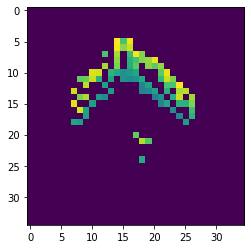

In [30]:
event_indice = 200
ts_off = plt.imshow(TSs[event_indice][0,:,:])